In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
#Leemos CSV1 
df1=pd.read_csv('Csvs/AnnualTicketSales.csv')
#Quitamos columnas undifined
df1=df1.drop(['Unnamed: 5'],axis=1)
df1

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97
5,2016,"1,30,25,56,378","$11,267,115,924","$11,931,416,424",$8.65
6,2015,"1,32,33,56,776","$11,155,900,636","$12,121,948,075",$8.43
7,2014,"1,25,74,02,920","$10,272,985,008","$11,517,810,744",$8.17
8,2013,"1,33,91,68,926","$10,887,446,341","$12,266,787,382",$8.13
9,2012,"1,38,09,21,942","$10,992,141,616","$12,649,244,986",$7.96


In [3]:
#Leemos CVS2
df2=pd.read_csv('Csvs/HighestGrossers.csv')
df2

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,"$253,367,455","$430,583,644","4,70,06,948"
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,"$300,404,434","$486,166,890","5,30,74,988"
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273","6,94,84,746"
8,2003,Finding Nemo,Adventure,G,Walt Disney,"$339,714,367","$516,050,346","5,63,37,374"
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,"$441,226,247","$650,826,473","7,10,50,925"


In [4]:
#Hacemo inner join
df12 = pd.merge(df1,df2,on=['YEAR'],how ="inner")
#Quitamos columnas que no se ocuparan
df12=df12.drop(['GENRE','MPAA RATING','TOTAL IN 2019 DOLLARS','AVERAGE TICKET PRICE','TOTAL INFLATION ADJUSTED BOX OFFICE','TOTAL FOR YEAR','TOTAL BOX OFFICE'],axis=1)
df12

,YEAR,TICKETS SOLD_x,MOVIE,DISTRIBUTOR,TICKETS SOLD_y
0,2021,"42,37,74,881",Shang-Chi and the Legend of the Ten Rings,Walt Disney,"2,44,78,897"
1,2020,"22,36,38,958",Bad Boys For Life,Sony Pictures,"2,23,16,359"
2,2019,"1,22,85,41,629",Avengers: Endgame,Walt Disney,"9,37,08,843"
3,2018,"1,31,15,36,128",Black Panther,Walt Disney,"7,68,45,177"
4,2017,"1,22,56,39,761",Star Wars Ep. VIII: The Last Jedi,Walt Disney,"5,76,60,910"
5,2016,"1,30,25,56,378",Finding Dory,Walt Disney,"5,62,19,140"
6,2015,"1,32,33,56,776",Star Wars Ep. VII: The Force Awakens,Walt Disney,"8,80,43,765"
7,2014,"1,25,74,02,920",Guardians of the Galaxy,Walt Disney,"4,07,65,637"
8,2013,"1,33,91,68,926",Iron Man 3,Walt Disney,"5,03,06,552"
9,2012,"1,38,09,21,942",The Avengers,Walt Disney,"7,83,11,295"


In [5]:
#agregamos una columna nueva donde conoscamos el porcentaje de lo que significo esa pelicula
#estas dos siguientes lineas son parceos
df12['TICKETS SOLD_y']=df12['TICKETS SOLD_y'].replace('[\$,]', '', regex=True).astype(float)
df12['TICKETS SOLD_x']=df12['TICKETS SOLD_x'].replace('[\$,]', '', regex=True).astype(float)
#operacion para el porcentaje
df12['PORXYEAR']=df12['TICKETS SOLD_y']*100/df12['TICKETS SOLD_x']
df12


,YEAR,TICKETS SOLD_x,MOVIE,DISTRIBUTOR,TICKETS SOLD_y,PORXYEAR
0,2021,4.237749e+08,Shang-Chi and the Legend of the Ten Rings,Walt Disney,24478897.0,5.776392
1,2020,2.236390e+08,Bad Boys For Life,Sony Pictures,22316359.0,9.978744
2,2019,1.228542e+09,Avengers: Endgame,Walt Disney,93708843.0,7.627649
3,2018,1.311536e+09,Black Panther,Walt Disney,76845177.0,5.859173
4,2017,1.225640e+09,Star Wars Ep. VIII: The Last Jedi,Walt Disney,57660910.0,4.704556
5,2016,1.302556e+09,Finding Dory,Walt Disney,56219140.0,4.316062
6,2015,1.323357e+09,Star Wars Ep. VII: The Force Awakens,Walt Disney,88043765.0,6.653063
7,2014,1.257403e+09,Guardians of the Galaxy,Walt Disney,40765637.0,3.242050
8,2013,1.339169e+09,Iron Man 3,Walt Disney,50306552.0,3.756550
9,2012,1.380922e+09,The Avengers,Walt Disney,78311295.0,5.670943


In [6]:
#guardamos una copia
df12v2=df12
#borramos columnas ya no necesario
df12=df12.drop(['MOVIE'], axis=1)
df12=df12.drop(['DISTRIBUTOR'], axis=1)
df12=df12.drop(['YEAR'], axis=1)
df12.describe()

,TICKETS SOLD_x,TICKETS SOLD_y,PORXYEAR
count,2.700000e+01,2.700000e+01,27.000000
mean,1.289943e+09,6.044945e+07,4.886870
std,2.938907e+08,1.855738e+07,1.540214
min,2.236390e+08,2.231636e+07,3.242050
25%,1.292736e+09,4.961042e+07,3.750839
50%,1.357350e+09,5.633737e+07,4.409612
75%,1.419302e+09,7.250329e+07,5.723667
max,1.575757e+09,9.452432e+07,9.978744


In [7]:
#normalizamos valores
df_normal=(df12-df12.min())/(df12.max()-df12.min())
df_normal

,TICKETS SOLD_x,TICKETS SOLD_y,PORXYEAR
0,0.148017,0.029949,0.376200
1,0.000000,0.000000,1.000000
2,0.743207,0.988706,0.651002
3,0.804588,0.755163,0.388488
4,0.741060,0.489483,0.217095
5,0.797946,0.469516,0.159427
6,0.813330,0.910251,0.506333
7,0.764552,0.255502,0.000000
8,0.825024,0.387633,0.076373
9,0.855904,0.775468,0.360547


In [8]:
#metodo para calcular  encontrar clusters cod de Jambu

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,max_iter=300)
    kmeans.fit(df_normal)#Aplico K-means a la base de datos
    wcss.append(kmeans.inertia_)

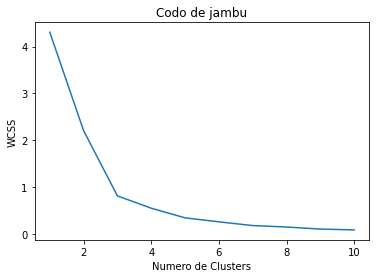

In [9]:
#Graficar los resultados de WCSS para formar codo de Jambu
plt.plot(range(1,11),wcss)
plt.title("Codo de jambu")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')#wccs es un indicador de que tan similares son los individuos
plt.show()

In [10]:
#Aplica el metodo k-means a la base de datos
clustering = KMeans(n_clusters=3,max_iter=300)#crea el modelo
clustering.fit(df_normal)

KMeans(n_clusters=3)

In [11]:
#Agregamos la calsifiacion al archivo original
df12v2['KMeans_CLusters']= clustering.labels_
df12v2


,YEAR,TICKETS SOLD_x,MOVIE,DISTRIBUTOR,TICKETS SOLD_y,PORXYEAR,KMeans_CLusters
0,2021,4.237749e+08,Shang-Chi and the Legend of the Ten Rings,Walt Disney,24478897.0,5.776392,1
1,2020,2.236390e+08,Bad Boys For Life,Sony Pictures,22316359.0,9.978744,1
2,2019,1.228542e+09,Avengers: Endgame,Walt Disney,93708843.0,7.627649,2
3,2018,1.311536e+09,Black Panther,Walt Disney,76845177.0,5.859173,2
4,2017,1.225640e+09,Star Wars Ep. VIII: The Last Jedi,Walt Disney,57660910.0,4.704556,0
5,2016,1.302556e+09,Finding Dory,Walt Disney,56219140.0,4.316062,0
6,2015,1.323357e+09,Star Wars Ep. VII: The Force Awakens,Walt Disney,88043765.0,6.653063,2
7,2014,1.257403e+09,Guardians of the Galaxy,Walt Disney,40765637.0,3.242050,0
8,2013,1.339169e+09,Iron Man 3,Walt Disney,50306552.0,3.756550,0
9,2012,1.380922e+09,The Avengers,Walt Disney,78311295.0,5.670943,2


In [12]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_df12 = pca.fit_transform(df_normal)
pca_df12_df = pd.DataFrame(data = pca_df12,columns=['Component1','Component2'])
pca_df12_nombre = pd.concat([pca_df12_df,df12v2[['KMeans_CLusters']]],axis=1)
pca_df12_nombre

,Component1,Component2,KMeans_CLusters
0,0.810786,0.019610,1
1,1.076661,0.547289,1
2,-0.199833,0.582190,2
3,-0.137288,0.231202,2
4,0.052731,-0.029133,0
5,0.015333,-0.101618,0
6,-0.225108,0.405244,2
7,0.151523,-0.333399,0
8,0.035649,-0.218945,0
9,-0.192453,0.205341,2


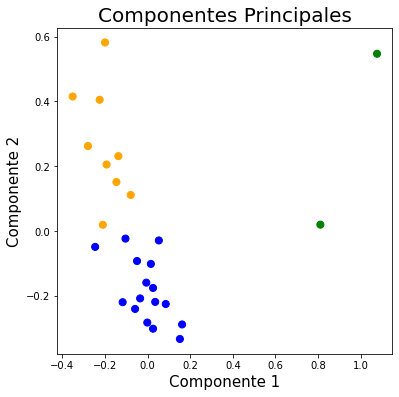

In [13]:
fig = plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize =15)
ax.set_ylabel('Componente 2', fontsize =15)
ax.set_title('Componentes Principales',fontsize=20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_df12_nombre.Component1,
           y= pca_df12_nombre.Component2,
          c=color_theme[pca_df12_nombre.KMeans_CLusters],s=50)
plt.show()